In [1]:
import os
import json
import pandas as pd

base_path =r"C:\Users\user\OneDrive\Desktop\Python\pulse-master\pulse-master\data\aggregated\transaction\country\india\state"

rows = []

for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):
            if file.endswith(".json"):
                file_path = os.path.join(year_path, file)

                with open(file_path, "r") as f:
                    data = json.load(f)

                    if data["data"] and "transactionData" in data["data"]:
                        for item in data["data"]["transactionData"]:
                            rows.append([
                                state,
                                year,
                                file.split(".")[0],
                                item["name"],
                                item["paymentInstruments"][0]["count"],
                                item["paymentInstruments"][0]["amount"]
                            ])

df_transaction = pd.DataFrame(rows, columns=[
    "State","Year","Quarter",
    "Transaction_Type","Count","Amount"
])

df_transaction.head()

,State,Year,Quarter,Transaction_Type,Count,Amount
0,andaman-&-nicobar-islands,2018,1,Recharge & bill payments,4200,1.845307e+06
1,andaman-&-nicobar-islands,2018,1,Peer-to-peer payments,1871,1.213866e+07
2,andaman-&-nicobar-islands,2018,1,Merchant payments,298,4.525072e+05
3,andaman-&-nicobar-islands,2018,1,Financial Services,33,1.060142e+04
4,andaman-&-nicobar-islands,2018,1,Others,256,1.846899e+05


In [2]:
df_transaction["State"].nunique()

36

In [3]:
df_transaction.columns

Index(['State', 'Year', 'Quarter', 'Transaction_Type', 'Count', 'Amount'], dtype='object')

In [4]:
df_transaction["State"].unique()

array(['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh',
       'assam', 'bihar', 'chandigarh', 'chhattisgarh',
       'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat',
       'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand',
       'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh',
       'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland',
       'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim',
       'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh',
       'uttarakhand', 'west-bengal'], dtype=object)

In [5]:
df_transaction.shape

(5034, 6)

In [32]:
df_transaction.info()
df_transaction.describe()
df_transaction["State"].nunique()
df_transaction.groupby("State")["Amount"].sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5034 entries, 0 to 5033
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   State             5034 non-null   object 
 1   Year              5034 non-null   object 
 2   Quarter           5034 non-null   object 
 3   Transaction_Type  5034 non-null   object 
 4   Count             5034 non-null   int64  
 5   Amount            5034 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 236.1+ KB


State
telangana                             4.165596e+13
karnataka                             4.067872e+13
maharashtra                           4.037420e+13
andhra-pradesh                        3.466908e+13
uttar-pradesh                         2.688521e+13
rajasthan                             2.634324e+13
madhya-pradesh                        1.912528e+13
bihar                                 1.790135e+13
west-bengal                           1.558416e+13
odisha                                1.226398e+13
tamil-nadu                            1.193622e+13
delhi                                 1.163752e+13
gujarat                               1.019291e+13
haryana                               9.645037e+12
jharkhand                             5.906646e+12
chhattisgarh                          4.890472e+12
assam                                 3.460792e+12
kerala                                3.076269e+12
punjab                                2.983078e+12
uttarakhand              

In [ ]:
#The Transaction Dataset was successfully loaded into a Dataframe.
#The dataset contains records from 36 states and union territories, confirming that the data extraction process is complete and correct.

#This Validation ensure the dataset is ready for SQL analysis and visualization

In [37]:
import pandas as pd
df = pd.read_csv("transactions.csv")
df_State = (
    df.groupby("state")["amount"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

print(df_State.head())

            state        amount
0       telangana  8.331191e+13
1       karnataka  8.135744e+13
2     maharashtra  8.074839e+13
3  andhra-pradesh  6.933816e+13
4   uttar-pradesh  5.377042e+13


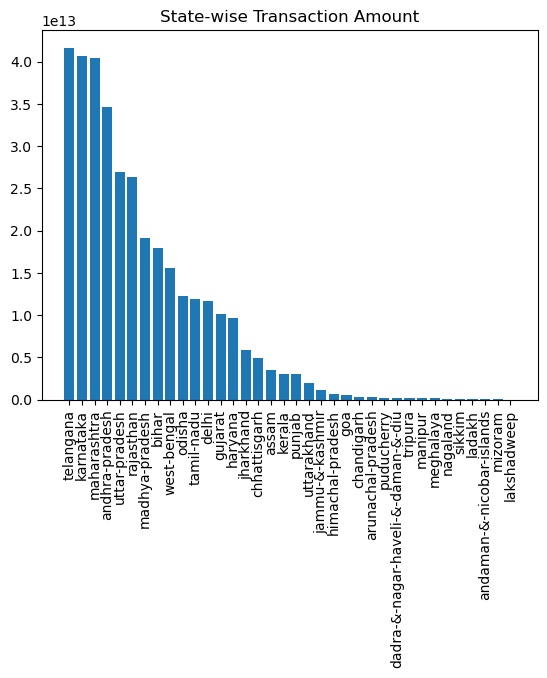

Index(['State', 'Total_Amount'], dtype='object')

In [38]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(df_state["State"], 
df_state["Total_Amount"])
plt.xticks(rotation=90)
plt.title("State-wise Transaction Amount")
plt.show()

df_state.columns

In [ ]:
#State-wise Transaction Analysis — Note
#This analysis calculates the total transaction amount for each state using aggregated transaction data.
#The SQL query groups transactions by state and sums the transaction amount to identify top-performing regions.
#The bar chart visualization helps compare transaction volumes across all states and highlights regions with high digital payment activity.
#This supports business decisions related to market expansion, regional marketing strategies, and resource allocation.

In [39]:
df_transaction.columns

Index(['State', 'Year', 'Quarter', 'Transaction_Type', 'Count', 'Amount'], dtype='object')

In [40]:
df_transaction["Quarter"].unique()

array(['1', '2', '3', '4'], dtype=object)

In [14]:
#Transaction Category Performance

In [45]:
import pandas as pd
df = pd.read_csv("transactions.csv")
df_State = (
    df.groupby("transaction_type")["amount"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

df_category.columns = ["Transaction_Type","Total_Amount"]

df_category.head()

,Transaction_Type,Total_Amount
0,Peer-to-peer payments,2.665274e+14
1,Merchant payments,6.533988e+13
2,Recharge & bill payments,1.333876e+13
3,Others,1.742807e+11
4,Financial Services,1.420188e+11


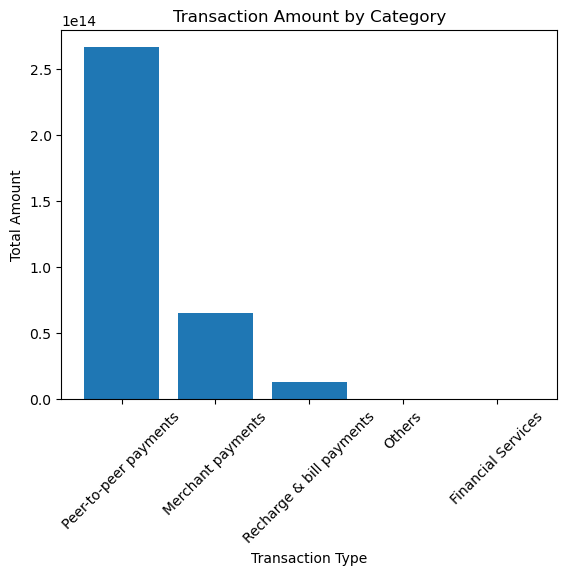

In [46]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(df_category["Transaction_Type"],df_category["Total_Amount"])
plt.xlabel("Transaction Type")
plt.ylabel("Total Amount")
plt.title("Transaction Amount by Category")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Transaction Category Analysis — Note

#This analysis calculates the total transaction amount for each payment category.

#The SQL query groups transactions by Transaction_Type and sums the Amount
#to identify which payment category contributes the highest transaction value.

#The bar chart visualization helps compare transaction categories and
#understand user payment behavior patterns on PhonePe.

In [62]:
import pandas as pd

df = pd.read_csv("transactions.csv")

df_trend = (
    df.groupby(["year","quarter"])["amount"]
    .sum()
    .reset_index()
    .sort_values(["year", "quarter"])
)

df_trend.columns = ["year", "quarter", "Total_Amount"]

df_trend.head()

,year,quarter,Total_Amount
0,2018,1,3.436669e+11
1,2018,2,6.087484e+11
2,2018,3,9.502030e+11
3,2018,4,1.343472e+12
4,2019,1,1.980043e+12


In [63]:
df_trend.columns

Index(['year', 'quarter', 'Total_Amount'], dtype='object')

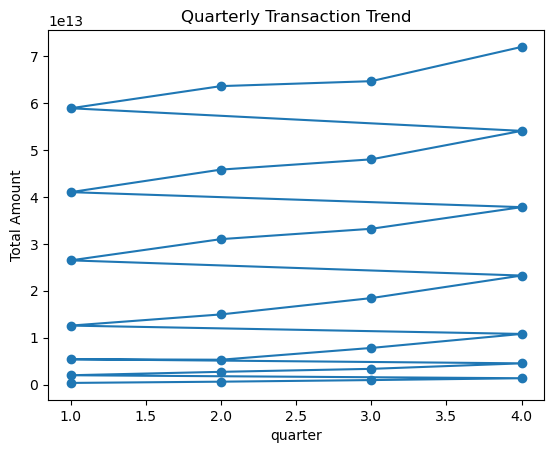

In [67]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_trend["quarter"], df_trend["Total_Amount"], marker='o')
plt.title("Quarterly Transaction Trend")
plt.xlabel("quarter")
plt.ylabel("Total Amount")
plt.show()

In [ ]:
# Quarterly Transaction Trend — Note

#This analysis tracks transaction growth across quarters.
#The SQL query groups transaction data by Year and Quarter
#and calculates total transaction amount.

#The line chart helps visualize transaction growth patterns
#and seasonal trends in digital payments.

In [68]:
import os
import json
import pandas as pd

base_path =r"C:\Users\user\OneDrive\Desktop\Python\pulse-master\pulse-master\data\aggregated\user\country\india\state"

rows = []

for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)

            with open(file_path, "r") as f:
                data = json.load(f)

                if data.get("data") and data["data"].get("usersByDevice"):
                    for item in data["data"]["usersByDevice"]:
                        rows.append([
                            state,
                            year,
                            file.split(".")[0],
                            item["brand"],
                            item["count"],
                            item["percentage"]
                        ])

In [69]:
df_user = pd.DataFrame(rows, columns=[
    "State","Year","Quarter",
    "Brand","User_Count","Percentage"
])


In [70]:
print(df_user.head(10))

                       State  Year Quarter     Brand  User_Count  Percentage
0  andaman-&-nicobar-islands  2018       1    Xiaomi        1665    0.247033
1  andaman-&-nicobar-islands  2018       1   Samsung        1445    0.214392
2  andaman-&-nicobar-islands  2018       1      Vivo         982    0.145697
3  andaman-&-nicobar-islands  2018       1      Oppo         501    0.074332
4  andaman-&-nicobar-islands  2018       1   OnePlus         332    0.049258
5  andaman-&-nicobar-islands  2018       1    Realme         316    0.046884
6  andaman-&-nicobar-islands  2018       1     Apple         229    0.033976
7  andaman-&-nicobar-islands  2018       1  Motorola         226    0.033531
8  andaman-&-nicobar-islands  2018       1    Lenovo         202    0.029970
9  andaman-&-nicobar-islands  2018       1    Huawei         158    0.023442


In [71]:
print(os.listdir(base_path))

['andaman-&-nicobar-islands', 'andhra-pradesh', 'arunachal-pradesh', 'assam', 'bihar', 'chandigarh', 'chhattisgarh', 'dadra-&-nagar-haveli-&-daman-&-diu', 'delhi', 'goa', 'gujarat', 'haryana', 'himachal-pradesh', 'jammu-&-kashmir', 'jharkhand', 'karnataka', 'kerala', 'ladakh', 'lakshadweep', 'madhya-pradesh', 'maharashtra', 'manipur', 'meghalaya', 'mizoram', 'nagaland', 'odisha', 'puducherry', 'punjab', 'rajasthan', 'sikkim', 'tamil-nadu', 'telangana', 'tripura', 'uttar-pradesh', 'uttarakhand', 'west-bengal']


In [72]:
print(state_path)
print(os.listdir(state_path))

C:\Users\user\OneDrive\Desktop\Python\pulse-master\pulse-master\data\aggregated\user\country\india\state\west-bengal
['2018', '2019', '2020', '2021', '2022', '2023', '2024']


In [73]:
print(year_path)
print(os.listdir(year_path))

C:\Users\user\OneDrive\Desktop\Python\pulse-master\pulse-master\data\aggregated\user\country\india\state\west-bengal\2024
['1.json', '2.json', '3.json', '4.json']


In [83]:
df.columns

Index(['state', 'year', 'quarter', 'brand', 'count', 'percentage'], dtype='object')

In [89]:
import pandas as pd

df = pd.read_csv("user.csv")

df_device = (
    df.groupby("brand")["count"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

df_device.head()

,brand,count
0,Xiaomi,1739125234
1,Samsung,1343207422
2,Vivo,1250830038
3,Oppo,840500490
4,Others,565900468


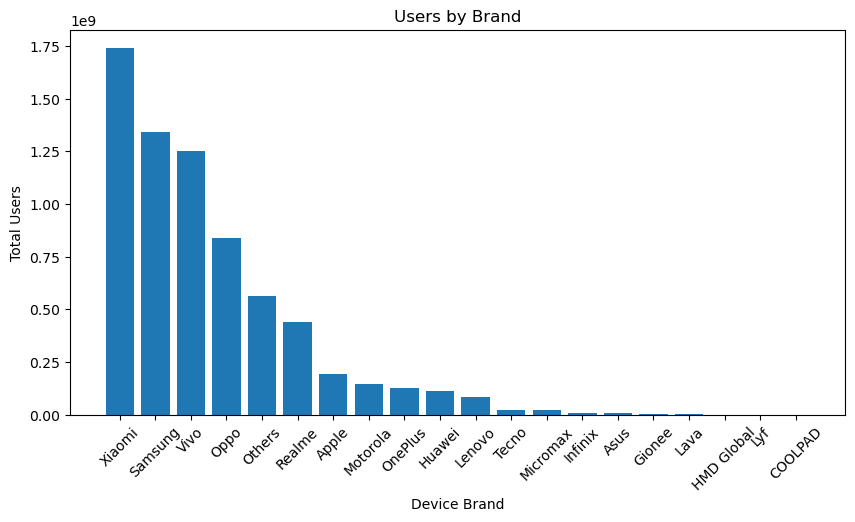

In [92]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.bar(df_device["brand"], df_device["count"])
plt.xticks(rotation=45)
plt.title("Users by Brand")
plt.xlabel("Device Brand")
plt.ylabel("Total Users")

plt.show()

In [ ]:
#Brandwise users

In [121]:
import pandas as pd

df = pd.read_csv("transactions.csv")

df_trend = (
    df.groupby("quarter")["amount"]
    .sum()
    .reset_index()
    .sort_values(["quarter"])
)

df_trend.columns = ["quarter", "Total_Amount"]

df_trend.head()

,quarter,Total_Amount
0,1,1.467105e+14
1,2,1.640485e+14
2,3,1.764663e+14
3,4,2.038194e+14


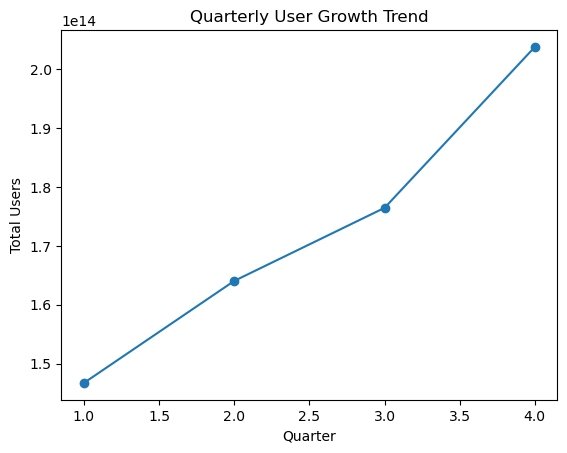

In [123]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df_trend["quarter"], df_trend["Total_Amount"], marker="o")
plt.xlabel("Quarter")
plt.ylabel("Total Users")
plt.title("Quarterly User Growth Trend")
plt.show()

In [ ]:
#Quarter Wise Growth Trend

In [133]:
import pandas as pd

df = pd.read_csv("user.csv")

df_state_user= (
    df.groupby("state")["count"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
df_state_user.columns = ["State","Total_Users"]

df_state_user.head()

,State,Total_Users
0,maharashtra,904150022
1,uttar-pradesh,711939266
2,karnataka,582745560
3,andhra-pradesh,450829670
4,rajasthan,431291176


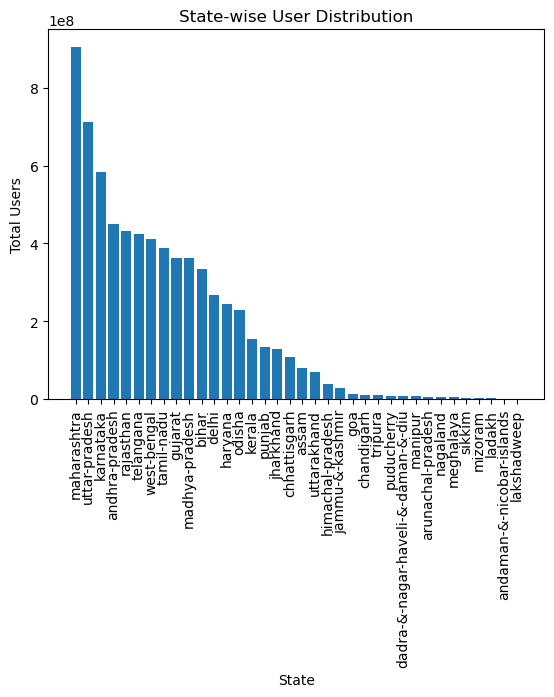

In [135]:

import matplotlib.pyplot as plt

plt.figure()
plt.bar(df_state_user["State"], df_state_user["Total_Users"])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Total Users")
plt.title("State-wise User Distribution")
plt.show()

In [ ]:
#State-wise User Analysis
#This analysis calculates total users in each state.
#It helps identify regions with high user adoption.
#This insight supports regional expansion strategy and targeted marketing.

In [136]:
import os, json
import pandas as pd

rows = []

base_path = r"C:\Users\User\OneDrive\Desktop\Python\pulse-master\pulse-master\data\aggregated\insurance\country\india\state"

for state in os.listdir(base_path):
    state_path = os.path.join(base_path, state)

    for year in os.listdir(state_path):
        year_path = os.path.join(state_path, year)

        for file in os.listdir(year_path):
            file_path = os.path.join(year_path, file)

            with open(file_path, "r") as f:
                data = json.load(f)

            if data.get("data") and data["data"].get("transactionData"):
                for item in data["data"]["transactionData"]:
                    rows.append([
                        state,
                        year,
                        file.split(".")[0],
                        item["name"],
                        item["paymentInstruments"][0]["count"],
                        item["paymentInstruments"][0]["amount"]
                    ])

df_insurance = pd.DataFrame(rows, columns=[
    "State","Year","Quarter","Insurance_Type","Count","Amount"
])

In [ ]:
query = """
SELECT State,
SUM(Amount) AS Total_Insurance
FROM aggregated_insurance
GROUP BY State
ORDER BY Total_Insurance DESC;
"""

In [144]:
import pandas as pd

df = pd.read_csv("insurance.csv")
print(df.columns)

Index(['state', 'total_insurance'], dtype='object')


In [145]:
import pandas as pd

df = pd.read_csv("insurance.csv")

df_insurance_state= (
    df.groupby("state")["total_insurance"]
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)
df_insurance_state.columns = ["State","Total_Insurance"]

df_insurance_state.head()

,State,Total_Insurance
0,karnataka,2.743155e+09
1,maharashtra,2.363129e+09
2,uttar-pradesh,1.740346e+09
3,tamil-nadu,1.555507e+09
4,kerala,1.313719e+09


In [138]:
df_insurance.shape

(682, 6)

In [137]:
df_insurance.head()

,State,Year,Quarter,Insurance_Type,Count,Amount
0,andaman-&-nicobar-islands,2020,2,Insurance,6,1360.0
1,andaman-&-nicobar-islands,2020,3,Insurance,41,15380.0
2,andaman-&-nicobar-islands,2020,4,Insurance,124,157975.0
3,andaman-&-nicobar-islands,2021,1,Insurance,225,244266.0
4,andaman-&-nicobar-islands,2021,2,Insurance,137,181504.0


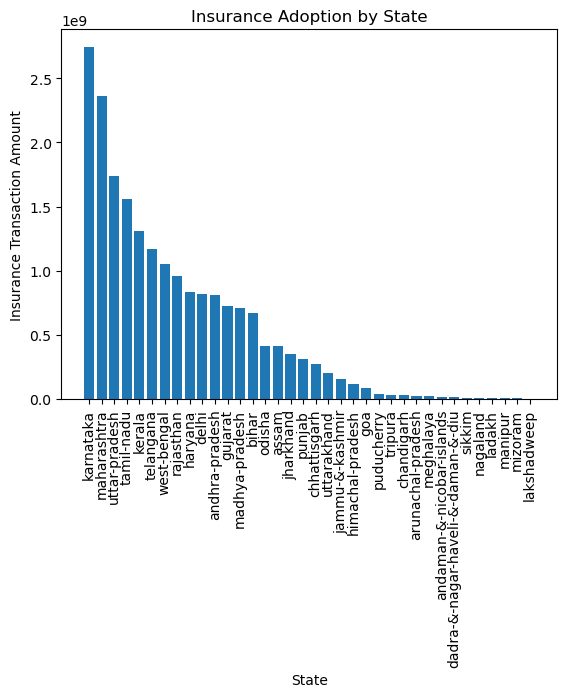

In [148]:
import matplotlib.pyplot as plt

plt.figure()
plt.bar(df_insurance_state["State"], df_insurance_state["Total_Insurance"])
plt.xticks(rotation=90)
plt.xlabel("State")
plt.ylabel("Insurance Transaction Amount")
plt.title("Insurance Adoption by State")
plt.show()

In [ ]:
#insurance Adoption based on State

In [149]:
print(df_transaction.shape)
print(df_user.shape)
print(df_insurance.shape)

(5034, 6)
(6732, 6)
(682, 6)


In [150]:
%who

base_path	 conn	 data	 df	 df_State	 df_category	 df_device	 df_insurance	 df_insurance_state	 
df_state	 df_state_user	 df_transaction	 df_trend	 df_user	 f	 file	 file_path	 item	 
json	 os	 pd	 plt	 query	 rows	 sqlite3	 state	 state_path	 
year	 year_path	 


In [151]:
conn.commit()

In [152]:
conn.close()

In [ ]:
###PhonePe Pulse Data Analysis Project
#This project extracts PhonePe Pulse data from JSON files, converts it into structured DataFrames, stores it in SQLite, and performs exploratory data analysis using visualizations.
#Key insights:
#Transaction volume varies significantly across states
#Xiaomi and Samsung dominate device usage
#User growth trends increase yearly
#Insurance adoption differs by region
###Tools used: Python, Pandas, SQLite, Matplotlib, JSON

In [158]:
import streamlit as st
import pandas as pd
import plotly.express as px

st.set_page_config(layout="wide")

st.title("PhonePe Pulse Analytics Dashboard")

# Load datasets
transactions = pd.read_csv("transactions.csv")
users = pd.read_csv("user.csv")
insurance = pd.read_csv("insurance.csv")

# Sidebar navigation
section = st.sidebar.selectbox(
    "Select Analysis",
    ["Transactions", "Users", "Insurance", "State Insights", "Trend Analysis"]
)

# ---------------- TRANSACTIONS ----------------
if section == "Transactions":
    st.header("Transaction Analysis")

    state_amount = (
        transactions.groupby("state")["amount"]
        .sum()
        .reset_index()
        .sort_values("amount", ascending=False)
    )

    fig = px.bar(state_amount.head(15), x="state", y="amount",
                 title="Top States by Transaction Amount")
    st.plotly_chart(fig, use_container_width=True)

# ---------------- USERS ----------------
elif section == "Users":
    st.header("User Brand Analysis")

    user_brand = (
        users.groupby("brand")["count"]
        .sum()
        .reset_index()
        .sort_values("count", ascending=False)
    )

    fig = px.bar(user_brand, x="brand", y="count",
                 title="Users by Device Brand")
    st.plotly_chart(fig, use_container_width=True)

# ---------------- INSURANCE ----------------
elif section == "Insurance":
    st.header("Insurance Adoption by State")

    insurance_state = (
        insurance.groupby("state")["amount"]
        .sum()
        .reset_index()
        .sort_values("amount", ascending=False)
    )

    fig = px.bar(insurance_state.head(15), x="state", y="amount",
                 title="Insurance Adoption by State")
    st.plotly_chart(fig, use_container_width=True)

# ---------------- STATE INSIGHTS ----------------
elif section == "State Insights":
    st.header("State-wise Users")

    state_users = (
        users.groupby("state")["count"]
        .sum()
        .reset_index()
        .sort_values("count", ascending=False)
    )

    fig = px.bar(state_users.head(15), x="state", y="count",
                 title="State-wise Users")
    st.plotly_chart(fig, use_container_width=True)

# ---------------- TREND ANALYSIS ----------------
elif section == "Trend Analysis":
    st.header("Transaction Trend")

    trend = (
        transactions.groupby(["year", "quarter"])["amount"]
        .sum()
        .reset_index()
        .sort_values(["year", "quarter"])
    )

    fig = px.line(trend, x="year", y="amount", color="quarter",
                  title="Transaction Trend by Quarter")

    st.plotly_chart(fig, use_container_width=True)

2026-02-12 14:25:18.292 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:25:18.306 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:25:18.310 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:25:18.415 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:25:18.418 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:25:18.422 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:25:18.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:25:18.440 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [155]:
import pandas as pd
import streamlit as st

st.title("PhonePe Analytics Dashboard")

transactions = pd.read_csv("transactions.csv")
user = pd.read_csv("user.csv")
insurance = pd.read_csv("insurance.csv")

st.write("Transactions", transactions.head())
st.write("User", user.head())
st.write("Insurance", insurance.head())

2026-02-12 14:19:03.136 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:19:03.141 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:19:03.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:19:03.232 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:19:03.236 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:19:03.238 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:19:03.379 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:19:03.381 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [164]:
import os
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'app.py.ipynb',
 'desktop.ini',
 'git',
 'india_states.geojson.txt',
 'insurance.csv',
 'notebooks',
 'phonepe.db',
 'README.md.txt',
 'requirements.txt',
 'scripts',
 'transactions.csv',
 'user.csv']

In [166]:
import json
with open("india_states.geojson") as f:
    india_geojson = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'india_states.geojson'

In [162]:
import json

st.subheader("India Transaction Map")

with open("india_states.geojson") as f:
    india_geojson = json.load(f)

map_df = (
    transactions.groupby("state")["amount"]
    .sum()
    .reset_index()
)

fig_map = px.choropleth(
    map_df,
    geojson=india_geojson,
    locations="state",
    featureidkey="properties.ST_NM",
    color="amount",
    color_continuous_scale="Reds",
    title="State-wise Transaction Amount"
)

fig_map.update_geos(fitbounds="locations", visible=False)

st.plotly_chart(fig_map, use_container_width=True)

2026-02-12 14:57:33.163 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2026-02-12 14:57:33.166 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


FileNotFoundError: [Errno 2] No such file or directory: 'india_states.geojson'